In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.2/800.2 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [9]:
import os
from ultralytics import YOLO
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import cv2
import torch
import numpy as np

import locale
locale.getpreferredencoding = lambda: "UTF-8"

ROOT_DIR = '/content/drive/MyDrive/CS231/CS231'

In [14]:

image_dir = os.path.join(ROOT_DIR, 'images')
label_dir = os.path.join(ROOT_DIR, 'labels')

image_files = os.listdir(image_dir)
label_files = os.listdir(label_dir)


for i in image_files:
    file = os.path.join(image_dir, i)
    if os.path.isdir(file):
        print(f"{i} {len(os.listdir(file))} image")
    else:
        print(f"{file} is not a directory")


test 70 image
val 83 image
train 549 image


In [7]:
model = YOLO("yolov8n.pt")

results = model.train(data=os.path.join(ROOT_DIR, 'config.yaml'), epochs=150)

100%|██████████| 6.25M/6.25M [00:00<00:00, 143MB/s]


Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/CS231/CS231/config.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1DBHiXEG443IbDu8nfb4IViAzxl4hF_bM/CS231/labels/train... 549 images, 0 backgrounds, 0 corrupt: 100%|██████████| 549/549 [03:41<00:00,  2.48it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1DBHiXEG443IbDu8nfb4IViAzxl4hF_bM/CS231/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1DBHiXEG443IbDu8nfb4IViAzxl4hF_bM/CS231/labels/val... 83 images, 0 backgrounds, 0 corrupt: 100%|██████████| 83/83 [01:12<00:00,  1.14it/s]

val: New cache created: /content/drive/.shortcut-targets-by-id/1DBHiXEG443IbDu8nfb4IViAzxl4hF_bM/CS231/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.59G       1.12      2.392      1.497         11        640: 100%|██████████| 35/35 [00:21<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all         83         89      0.915      0.117      0.516      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150       2.3G       1.14      1.897      1.482         11        640: 100%|██████████| 35/35 [00:16<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         83         89      0.352       0.65      0.476      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.29G      1.207       1.83      1.529         12        640: 100%|██████████| 35/35 [00:18<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         83         89      0.332      0.433      0.384      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150       2.3G      1.241      1.777      1.551         13        640: 100%|██████████| 35/35 [00:18<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         83         89     0.0598      0.152     0.0278    0.00937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.31G      1.252      1.694      1.554         12        640: 100%|██████████| 35/35 [00:18<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         83         89      0.491      0.408      0.446      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150       2.3G       1.21      1.561      1.505         13        640: 100%|██████████| 35/35 [00:17<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         83         89      0.469      0.538      0.452      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.29G      1.238      1.534      1.525         11        640: 100%|██████████| 35/35 [00:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         83         89      0.603      0.548      0.599      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150       2.3G      1.216      1.421      1.501         17        640: 100%|██████████| 35/35 [00:17<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         83         89      0.578      0.491      0.594      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.31G      1.214       1.41      1.509         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all         83         89      0.487      0.559      0.571      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150       2.3G      1.158      1.348       1.48         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all         83         89      0.515      0.598      0.615      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.29G       1.12      1.309      1.435         15        640: 100%|██████████| 35/35 [00:16<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         83         89      0.495      0.779      0.651      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150       2.3G      1.138      1.266      1.466         10        640: 100%|██████████| 35/35 [00:16<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         83         89      0.661      0.564       0.63      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150       2.3G      1.129      1.259      1.439          9        640: 100%|██████████| 35/35 [00:16<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all         83         89      0.715       0.64      0.636      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150       2.3G      1.106      1.231      1.429          9        640: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all         83         89      0.673      0.571      0.614      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.29G      1.081      1.167      1.393         15        640: 100%|██████████| 35/35 [00:17<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         83         89      0.443      0.663      0.564      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150       2.3G      1.133        1.2      1.433         16        640: 100%|██████████| 35/35 [00:18<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         83         89      0.638      0.653       0.73      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150       2.3G      1.097       1.11      1.409         13        640: 100%|██████████| 35/35 [00:17<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         83         89      0.571      0.674       0.67      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.31G      1.055       1.09      1.377         17        640: 100%|██████████| 35/35 [00:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         83         89      0.645      0.644      0.697       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.29G      1.064      1.051        1.4         17        640: 100%|██████████| 35/35 [00:18<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         83         89       0.66      0.615      0.721      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150       2.3G      1.009      1.021      1.355         16        640: 100%|██████████| 35/35 [00:18<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         83         89      0.654      0.729      0.742      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.31G     0.9847     0.9939      1.346         12        640: 100%|██████████| 35/35 [00:17<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         83         89      0.758       0.62      0.708      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150       2.3G      1.017      1.043      1.371         13        640: 100%|██████████| 35/35 [00:17<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         83         89      0.485      0.677      0.641      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.29G      1.017          1      1.352         12        640: 100%|██████████| 35/35 [00:17<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         83         89      0.734      0.709      0.697      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150       2.3G      1.031      1.037      1.387         10        640: 100%|██████████| 35/35 [00:17<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         83         89      0.641      0.738      0.671      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150       2.3G      1.015     0.9713      1.363         16        640: 100%|██████████| 35/35 [00:16<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         83         89      0.566      0.733      0.731       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.31G      1.016     0.9554      1.369         13        640: 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all         83         89      0.624      0.691       0.69      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.29G      0.976     0.9538      1.341         12        640: 100%|██████████| 35/35 [00:15<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         83         89      0.809       0.71      0.787      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150       2.3G     0.9668     0.9136      1.321          9        640: 100%|██████████| 35/35 [00:16<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]

                   all         83         89      0.671      0.771      0.804      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150       2.3G      0.984     0.9579      1.345         13        640: 100%|██████████| 35/35 [00:16<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all         83         89      0.727      0.621      0.718      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.31G      0.945     0.8939        1.3         18        640: 100%|██████████| 35/35 [00:16<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all         83         89      0.682      0.694      0.743      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.29G     0.9414     0.8886      1.317         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all         83         89      0.705      0.622      0.729      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150       2.3G     0.9323     0.8688      1.288         15        640: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

                   all         83         89      0.639      0.624      0.622      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.31G     0.9361     0.8963      1.312         10        640: 100%|██████████| 35/35 [00:17<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         83         89      0.754       0.68      0.765      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150       2.3G     0.9319      0.843      1.286         13        640: 100%|██████████| 35/35 [00:18<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         83         89       0.65      0.725      0.785      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.29G     0.8764      0.812      1.278         16        640: 100%|██████████| 35/35 [00:17<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         83         89      0.734      0.807       0.79      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150       2.3G     0.9127     0.8404      1.301         13        640: 100%|██████████| 35/35 [00:18<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         83         89      0.757      0.582      0.702      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150       2.3G     0.8846     0.7998       1.28         12        640: 100%|██████████| 35/35 [00:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         83         89      0.601      0.754      0.762      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150       2.3G     0.9087     0.8203      1.269         12        640: 100%|██████████| 35/35 [00:17<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         83         89       0.69      0.769      0.809      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.31G     0.8947     0.7773       1.27         10        640: 100%|██████████| 35/35 [00:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         83         89      0.864      0.812      0.865      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150       2.3G     0.8972     0.7976      1.266         17        640: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         83         89      0.694      0.715      0.722      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150       2.3G     0.8639     0.7765      1.259          7        640: 100%|██████████| 35/35 [00:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         83         89      0.847      0.746      0.811      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150       2.3G     0.9075     0.8449      1.317         11        640: 100%|██████████| 35/35 [00:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83         89      0.729      0.749      0.773      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.29G     0.9047     0.7891      1.268         13        640: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         83         89      0.746       0.86      0.859      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150       2.3G     0.8737     0.7694      1.256         19        640: 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         83         89      0.734      0.655      0.794      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150       2.3G     0.8357     0.7479      1.242         15        640: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         83         89      0.625      0.796      0.801      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150       2.3G     0.8684     0.7657       1.24         15        640: 100%|██████████| 35/35 [00:15<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         83         89      0.718      0.706      0.751      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.29G     0.8447     0.7357      1.235         19        640: 100%|██████████| 35/35 [00:17<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         83         89      0.675      0.721      0.744      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150       2.3G     0.8152     0.7322      1.221         10        640: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

                   all         83         89      0.837       0.72       0.78      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150       2.3G     0.8131     0.6846      1.213         18        640: 100%|██████████| 35/35 [00:16<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

                   all         83         89      0.699      0.692      0.768      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150       2.3G     0.8402     0.7278      1.238         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

                   all         83         89      0.841      0.739      0.845      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150       2.3G     0.8198     0.6798      1.218         13        640: 100%|██████████| 35/35 [00:18<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         83         89      0.691      0.763      0.758      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150       2.3G     0.8221     0.6884      1.207         13        640: 100%|██████████| 35/35 [00:17<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         83         89      0.623      0.747      0.754      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150       2.3G     0.7835      0.659      1.192         10        640: 100%|██████████| 35/35 [00:17<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         83         89       0.76      0.745      0.778      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150       2.3G     0.8537     0.7167      1.241         11        640: 100%|██████████| 35/35 [00:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         83         89      0.692      0.763      0.774      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.29G     0.7711     0.6708      1.185         11        640: 100%|██████████| 35/35 [00:18<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         83         89      0.753      0.729      0.815       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150       2.3G     0.7788     0.6524      1.172         13        640: 100%|██████████| 35/35 [00:18<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         83         89      0.721      0.819       0.84      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150       2.3G     0.7889     0.6822      1.201         13        640: 100%|██████████| 35/35 [00:17<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         83         89      0.563      0.772      0.708      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150       2.3G     0.7898     0.6483      1.196         13        640: 100%|██████████| 35/35 [00:17<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         83         89      0.711      0.704       0.73      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.29G     0.8147     0.6795      1.217          9        640: 100%|██████████| 35/35 [00:18<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         83         89      0.713      0.566       0.64      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150       2.3G     0.7688     0.6256       1.19         13        640: 100%|██████████| 35/35 [00:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83         89      0.773      0.679      0.793      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.32G     0.7722     0.6425      1.181         14        640: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         83         89      0.708      0.667      0.759      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150       2.3G     0.7617     0.6318      1.177         19        640: 100%|██████████| 35/35 [00:17<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         83         89      0.748      0.734      0.783      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.29G     0.7727     0.6504      1.182          9        640: 100%|██████████| 35/35 [00:16<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         83         89       0.75      0.767       0.82      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150       2.3G     0.7748     0.6164        1.2         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

                   all         83         89      0.841      0.643      0.807      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150       2.3G     0.7431     0.6186      1.171         13        640: 100%|██████████| 35/35 [00:16<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]

                   all         83         89       0.84      0.813      0.855      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150       2.3G     0.7331     0.5872      1.149         14        640: 100%|██████████| 35/35 [00:16<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]

                   all         83         89      0.826      0.672      0.784      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.29G     0.7427     0.5867      1.161         15        640: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         83         89      0.723      0.631      0.702      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150       2.3G     0.7252     0.5901       1.16         15        640: 100%|██████████| 35/35 [00:18<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         83         89      0.682      0.792      0.788      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150       2.3G     0.7323     0.6007      1.169         12        640: 100%|██████████| 35/35 [00:18<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83         89      0.773      0.729      0.831      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150       2.3G      0.752     0.6228      1.184          7        640: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         83         89      0.849      0.777      0.875      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.29G     0.7408     0.6164      1.165         13        640: 100%|██████████| 35/35 [00:17<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         83         89      0.657      0.801      0.788      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150       2.3G       0.74     0.6065      1.147         13        640: 100%|██████████| 35/35 [00:18<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         83         89      0.633      0.751      0.746      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150       2.3G     0.7178     0.5849      1.161         15        640: 100%|██████████| 35/35 [00:17<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         83         89      0.769      0.631      0.783      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150       2.3G     0.7214     0.5823      1.156         12        640: 100%|██████████| 35/35 [00:17<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         83         89      0.836      0.692      0.839      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.29G     0.7111     0.6027       1.16         13        640: 100%|██████████| 35/35 [00:17<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         83         89      0.751      0.797      0.842      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150       2.3G     0.7147     0.5836      1.156         17        640: 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         83         89      0.851       0.76      0.874      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150       2.3G     0.6947     0.5589      1.137         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all         83         89        0.8      0.745      0.827      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150       2.3G     0.7144     0.5519      1.159         11        640: 100%|██████████| 35/35 [00:16<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         83         89      0.793      0.698      0.803      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.29G     0.7132     0.5842      1.152         16        640: 100%|██████████| 35/35 [00:15<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all         83         89      0.743      0.764      0.781      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150       2.3G      0.678     0.5589       1.14          8        640: 100%|██████████| 35/35 [00:16<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]

                   all         83         89      0.779      0.587      0.716      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150       2.3G     0.6812     0.5582      1.121         15        640: 100%|██████████| 35/35 [00:16<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

                   all         83         89      0.794      0.753      0.836       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150       2.3G      0.668     0.5456      1.128         10        640: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         83         89      0.759      0.758      0.797      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.29G     0.6935     0.5726      1.124         12        640: 100%|██████████| 35/35 [00:17<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         83         89      0.692      0.723      0.781      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150       2.3G     0.6576      0.535      1.117         18        640: 100%|██████████| 35/35 [00:17<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         83         89      0.734        0.7      0.791      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150       2.3G     0.6544     0.5291      1.114         10        640: 100%|██████████| 35/35 [00:18<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         83         89      0.792      0.696      0.826      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150       2.3G     0.6645     0.5288      1.121         12        640: 100%|██████████| 35/35 [00:17<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         83         89      0.861      0.719      0.807      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.31G     0.6883     0.5674      1.148         16        640: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         83         89      0.865      0.636      0.802      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150       2.3G      0.666     0.5532      1.119          9        640: 100%|██████████| 35/35 [00:18<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         83         89      0.784      0.719      0.786      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150       2.3G     0.6579     0.5302      1.121         13        640: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         83         89      0.827      0.705      0.813      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150       2.3G     0.6391     0.5138      1.113         14        640: 100%|██████████| 35/35 [00:17<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         83         89      0.772      0.738      0.806      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.29G     0.6557     0.5028      1.114         12        640: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         83         89      0.802      0.753      0.801      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150       2.3G     0.6325     0.4987      1.097         10        640: 100%|██████████| 35/35 [00:16<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         83         89      0.711      0.819      0.804      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.32G     0.6608     0.5096      1.122         13        640: 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         83         89      0.791      0.758      0.824      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150       2.3G     0.6244      0.481      1.096         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all         83         89       0.79      0.712      0.836       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.29G     0.6317     0.4901      1.098         15        640: 100%|██████████| 35/35 [00:16<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]

                   all         83         89      0.734      0.786      0.825      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150       2.3G     0.6332     0.4872      1.097         15        640: 100%|██████████| 35/35 [00:16<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]

                   all         83         89      0.696      0.682      0.752      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150       2.3G     0.6638     0.5011      1.119         13        640: 100%|██████████| 35/35 [00:17<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]

                   all         83         89      0.645      0.725      0.726      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150       2.3G     0.6112     0.4844      1.089         15        640: 100%|██████████| 35/35 [00:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         83         89      0.765      0.781      0.788      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.29G     0.6275     0.5078      1.092         14        640: 100%|██████████| 35/35 [00:17<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         83         89      0.854      0.735      0.842      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150       2.3G      0.615     0.4845      1.093         10        640: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         83         89      0.835      0.772       0.85      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.31G     0.6005     0.4739      1.082         12        640: 100%|██████████| 35/35 [00:17<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         83         89      0.878      0.695      0.843      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150       2.3G     0.5945     0.4714      1.082         13        640: 100%|██████████| 35/35 [00:18<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         83         89      0.783      0.683      0.807      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.29G     0.5987     0.4866      1.099         13        640: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         83         89      0.756      0.743      0.801       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150       2.3G      0.604     0.4643      1.085         11        640: 100%|██████████| 35/35 [00:17<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         83         89      0.815       0.78      0.847      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150       2.3G      0.603     0.4664      1.087         11        640: 100%|██████████| 35/35 [00:17<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         83         89       0.82      0.792      0.868      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.34G      0.583     0.4407      1.072         12        640: 100%|██████████| 35/35 [00:17<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         83         89      0.752      0.703      0.778      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.29G     0.5955     0.4731      1.088         14        640: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         83         89      0.685      0.795      0.759      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150       2.3G     0.5926     0.4674      1.087         14        640: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         83         89      0.867      0.772      0.848      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.31G     0.6022     0.4571      1.091         14        640: 100%|██████████| 35/35 [00:16<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

                   all         83         89      0.809      0.817      0.859      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150       2.3G     0.5825     0.4282      1.077         16        640: 100%|██████████| 35/35 [00:16<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]

                   all         83         89      0.821      0.818      0.853      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.29G     0.5734     0.4498      1.068         14        640: 100%|██████████| 35/35 [00:16<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all         83         89      0.714       0.82      0.839      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150       2.3G     0.5727     0.4272      1.068         14        640: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         83         89      0.835      0.763      0.831      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.31G      0.565     0.4285      1.067         16        640: 100%|██████████| 35/35 [00:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         83         89      0.852      0.712      0.798       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150       2.3G     0.5542     0.4381      1.058         10        640: 100%|██████████| 35/35 [00:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         83         89      0.726      0.731      0.761      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.29G     0.5393     0.4228      1.049         11        640: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         83         89      0.734      0.732      0.772      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150       2.3G     0.5528     0.4462      1.076          8        640: 100%|██████████| 35/35 [00:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         83         89      0.829      0.751      0.808      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.31G     0.5326     0.4234      1.051         12        640: 100%|██████████| 35/35 [00:17<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         83         89      0.881      0.703      0.857       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150       2.3G     0.5352     0.3957       1.05         14        640: 100%|██████████| 35/35 [00:18<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         83         89      0.801      0.745      0.862      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.29G       0.56     0.4152      1.052         16        640: 100%|██████████| 35/35 [00:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         83         89      0.763      0.778      0.826       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150       2.3G     0.5423     0.4274      1.067         17        640: 100%|██████████| 35/35 [00:18<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         83         89      0.867        0.7      0.828      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150       2.3G     0.5389     0.3943      1.058         16        640: 100%|██████████| 35/35 [00:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         83         89      0.869       0.72       0.85      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150       2.3G     0.5327      0.399      1.044         13        640: 100%|██████████| 35/35 [00:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         83         89      0.748      0.755       0.83      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.31G      0.549     0.4097      1.051          9        640: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         83         89       0.82      0.719      0.822      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150       2.3G     0.5289     0.4135      1.052         14        640: 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         83         89      0.897      0.711      0.831      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150       2.3G     0.5215     0.4059      1.048         13        640: 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all         83         89      0.808      0.765      0.828      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150       2.3G     0.5321     0.4103      1.044          9        640: 100%|██████████| 35/35 [00:16<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]

                   all         83         89      0.862      0.732      0.841       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.29G     0.5205     0.4014      1.047         15        640: 100%|██████████| 35/35 [00:16<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all         83         89      0.794      0.747      0.845      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150       2.3G     0.5208     0.3991      1.039         19        640: 100%|██████████| 35/35 [00:16<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]

                   all         83         89      0.785      0.746      0.829      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.31G     0.5367     0.4012      1.055         11        640: 100%|██████████| 35/35 [00:16<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         83         89      0.743      0.775      0.819      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.32G     0.4994     0.3953      1.035         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

                   all         83         89      0.849       0.71      0.823      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.29G     0.4996     0.3852      1.047          8        640: 100%|██████████| 35/35 [00:17<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         83         89      0.825      0.719      0.816      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150       2.3G     0.5333     0.4036      1.039         13        640: 100%|██████████| 35/35 [00:17<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         83         89      0.772      0.755      0.821      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.31G     0.5083     0.3946       1.04         17        640: 100%|██████████| 35/35 [00:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         83         89      0.796      0.743      0.813      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150       2.3G     0.5044     0.3861      1.033         14        640: 100%|██████████| 35/35 [00:18<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         83         89       0.84      0.723      0.823      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.29G     0.4877     0.3767      1.031         13        640: 100%|██████████| 35/35 [00:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         83         89      0.755      0.731      0.793      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.32G     0.4945     0.3851      1.025         12        640: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         83         89      0.757      0.728       0.81      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150       2.3G     0.4855     0.3908      1.025          7        640: 100%|██████████| 35/35 [00:18<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         83         89      0.754      0.762      0.807      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150       2.3G     0.5011     0.3857       1.04          9        640: 100%|██████████| 35/35 [00:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         83         89      0.777      0.744      0.808      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.29G     0.4866       0.38      1.031         14        640: 100%|██████████| 35/35 [00:17<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         83         89      0.797      0.745      0.821       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150       2.3G     0.4982     0.3951      1.028         12        640: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         83         89      0.831      0.729      0.811      0.636


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.44G     0.4025     0.3024      1.007          5        640: 100%|██████████| 35/35 [00:20<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         83         89      0.745      0.701      0.786       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150       2.3G     0.3648     0.2662     0.9568          6        640: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         83         89      0.651       0.77      0.763      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.29G     0.3578     0.2542     0.9615          5        640: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         83         89      0.733      0.738       0.77      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150       2.3G     0.3431     0.2478     0.9524          7        640: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         83         89      0.794      0.739      0.783        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150       2.3G     0.3342     0.2373      0.944          5        640: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         83         89      0.799       0.72      0.785      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150       2.3G     0.3352     0.2374     0.9575          5        640: 100%|██████████| 35/35 [00:16<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         83         89      0.796      0.714      0.791      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      2.29G     0.3308     0.2285     0.9379          5        640: 100%|██████████| 35/35 [00:17<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         83         89      0.758       0.74      0.784      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150       2.3G     0.3442     0.2422     0.9583          5        640: 100%|██████████| 35/35 [00:17<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         83         89      0.778        0.7      0.788      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150       2.3G     0.3207     0.2268     0.9237          5        640: 100%|██████████| 35/35 [00:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         83         89      0.802        0.7      0.798      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150       2.3G     0.3336     0.2332     0.9485          5        640: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         83         89       0.81      0.707      0.806      0.623



150 epochs completed in 0.869 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


                   all         83         89      0.803      0.745       0.86      0.665
            ArmDisable         41         42      0.783       0.81      0.897      0.713
            LegDisable         42         47      0.824      0.681      0.823      0.617
Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/train


In [8]:
!scp -r /content/runs/ '/content/drive/MyDrive/CS231/CS231'

In [9]:
model.val()

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/1DBHiXEG443IbDu8nfb4IViAzxl4hF_bM/CS231/labels/val.cache... 83 images, 0 backgrounds, 0 corrupt: 100%|██████████| 83/83 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  83%|████████▎ | 5/6 [00:04<00:00,  1.02it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-9

                   all         83         89      0.802      0.745      0.861      0.665
            ArmDisable         41         42       0.78       0.81      0.899      0.714
            LegDisable         42         47      0.824      0.681      0.823      0.616
Speed: 0.3ms preprocess, 23.2ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9a56c8ba00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804


0: 640x448 1 LegDisable, 756.8ms
Speed: 54.6ms preprocess, 756.8ms inference, 38.3ms postprocess per image at shape (1, 3, 640, 448)


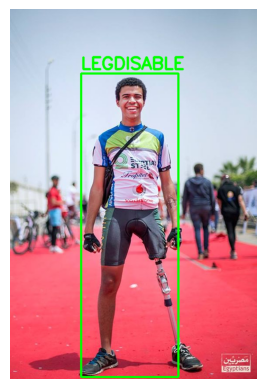

In [15]:

import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import cv2
import torch
import numpy as np

TEST_LINK = "https://i.pinimg.com/564x/35/9e/e7/359ee7fd043abcef0caadde475c37dea.jpg"
MODEL_PATH = os.path.join(ROOT_DIR, 'runs/detect/train/weights/best.pt')
OUTPUT_IMAGE_PATH = os.path.join(ROOT_DIR, 'image_out.jpg')

THRESHOLD = 0.5

response = requests.get(TEST_LINK)
img = Image.open(BytesIO(response.content))
img_cv2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

model = YOLO(MODEL_PATH)

results = model(img)[0]

for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result
    if score > THRESHOLD:
        cv2.rectangle(img_cv2, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
        cv2.putText(img_cv2, model.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

cv2.imwrite(OUTPUT_IMAGE_PATH, img_cv2)

img_output = Image.fromarray(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB))
plt.imshow(img_output)
plt.axis('off')
plt.show()

In [16]:
video_path = os.path.join(ROOT_DIR, 'video.mp4')
print(video_path)
video_path_out = '{}_out.mp4'.format(video_path)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()

H, W, _ = frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_path_out, fourcc, 20.0, (W, H))

MODEL_PATH = os.path.join(ROOT_DIR, 'runs/detect/train/weights/best.pt')
model = YOLO(MODEL_PATH)
threshold = 0.5

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()

/content/drive/MyDrive/CS231/CS231/video.mp4

0: 416x640 1 ArmDisable, 236.3ms
Speed: 8.2ms preprocess, 236.3ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 ArmDisable, 164.5ms
Speed: 7.5ms preprocess, 164.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 ArmDisable, 184.8ms
Speed: 6.0ms preprocess, 184.8ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 ArmDisable, 173.0ms
Speed: 6.7ms preprocess, 173.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 ArmDisable, 195.3ms
Speed: 4.3ms preprocess, 195.3ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 ArmDisable, 174.7ms
Speed: 5.2ms preprocess, 174.7ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 ArmDisable, 168.5ms
Speed: 7.4ms preprocess, 168.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 ArmDisable, 184.3